# Prepare Environment

Load necessary modules and attempt to compile the GrOpt library if it isn't already

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
try:
    import gropt
except:
    import build_gropt
    build_gropt.build_gropt()

from helper_utils import *

%matplotlib inline

# Simple Phase Encode

Generate a waveform with $M_0 = 11.74$, which is the phase encode required to encode 1mm resolution.

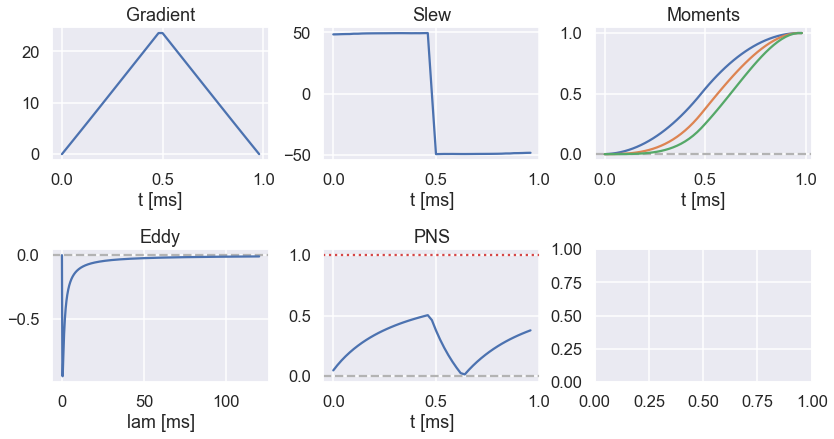

In [2]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.05
params['smax']  = 50.0
params['moment_params']  = [[0, 0, 0, -1, -1, 11.74, 1.0e-3]]
params['TE']  = 1.0
params['dt']  = 20e-6

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)

### Run TE finder for same waveform

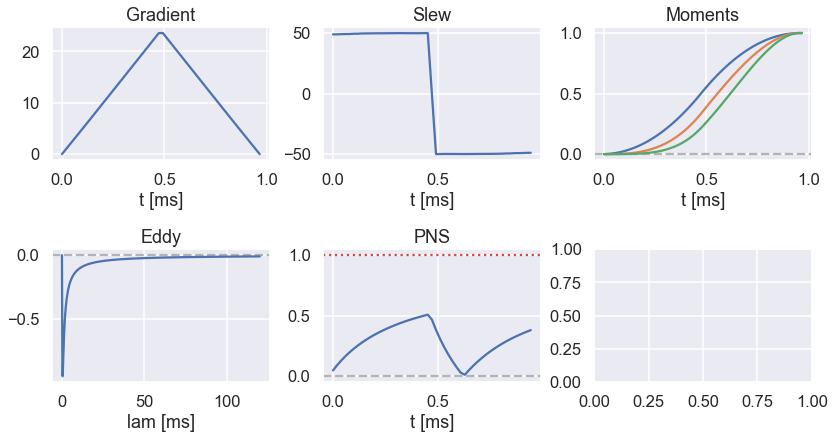

In [3]:
G_min, T_min = get_min_TE(params)
plot_waveform(G_min, params)

# Flow comped phase encode

Generate a waveform with $M_0 = 11.74$ and $M_1 = 0$.

So the same phase encoding as the last waveform, but flow compensated.


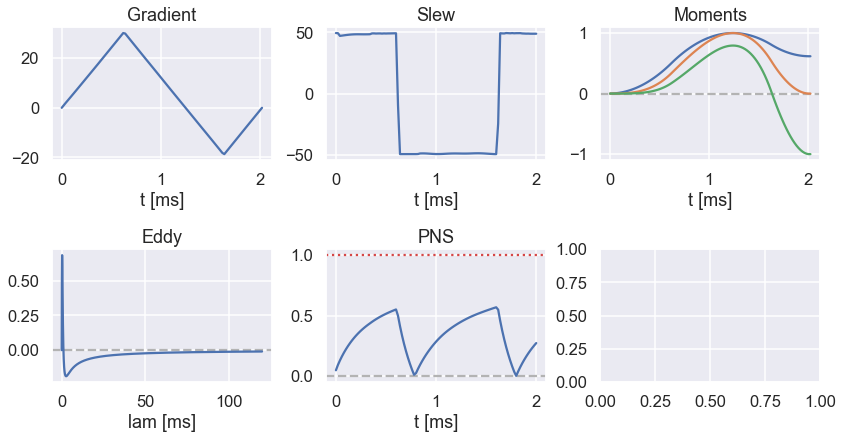

In [4]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.05
params['smax']  = 50.0
params['moment_params']  = [[0, 0, 0, -1, -1, 11.74, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 0, 1.0e-3])
params['TE']  = 2.04
params['dt']  = 20e-6

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)

# Flow encoding bipolar

Basically the opposite of the previous waveform.  $M_0 = 0$ and $M_1 = 11.74$.

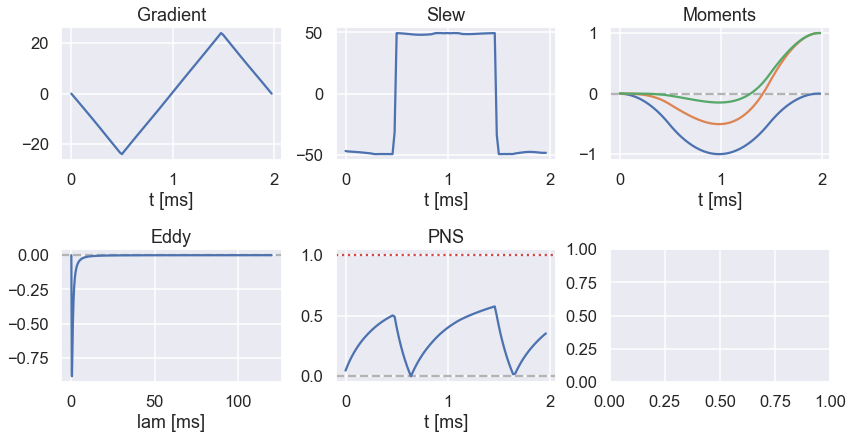

In [5]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.05
params['smax']  = 50.0
params['moment_params']  = [[0, 0, 0, -1, -1, 0.0, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 11.74, 1.0e-3])
params['TE']  = 2.0
params['dt']  = 20e-6

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)